In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import glob, re

color_palette = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

save_plots = False

### Plots for FFTW testing

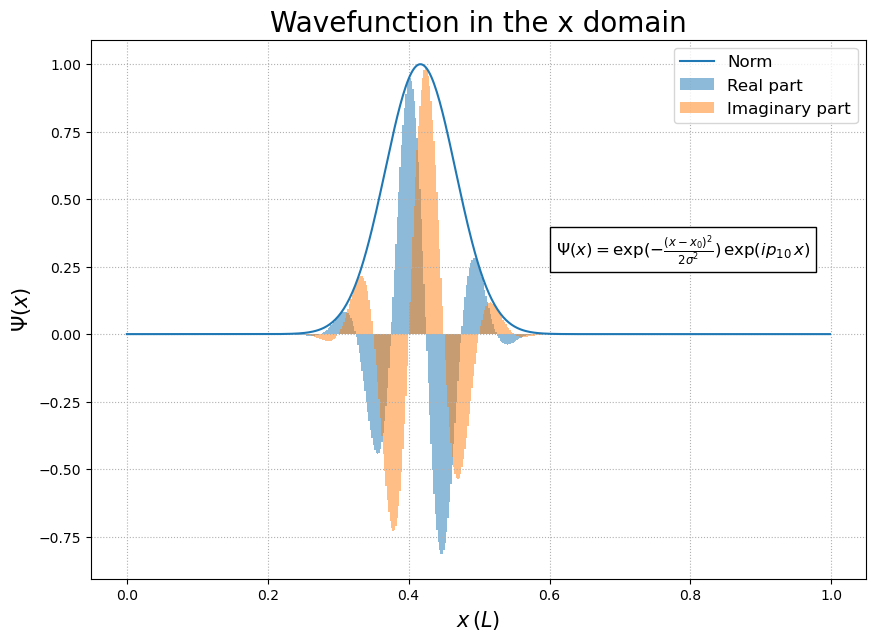

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# grid
grid_x = np.loadtxt("results/init.dat", max_rows=1)
dx = grid_x[1]-grid_x[0]

# initialized wavefunction
re_init, im_init = np.loadtxt("results/init.dat", skiprows=1, unpack=True)
init = re_init + im_init*1j

# plot
ax.bar(x=grid_x, height=np.real(init), label="Real part", alpha=0.5, width=dx)
ax.bar(x=grid_x, height=np.imag(init), label="Imaginary part", alpha=0.5, width=dx)
ax.plot(grid_x, np.abs(init), label="Norm")
    

ax.set_title(f"Wavefunction in the x domain", fontsize=20)
ax.set_xlabel(r"$x\, (L)$", fontsize=15)
ax.set_ylabel(r"$\Psi(x)$", fontsize=15)
ax.grid(True, which="both", linestyle=":")

# print formula
ax.text(0.6, 0.6, s=r"$\Psi(x) = \exp(-\frac{(x-x_0)^2}{2\sigma^2})\, \exp(i p_{10}\, x )$",
        transform=ax.transAxes, fontsize=12, bbox=dict(facecolor="w"))

ax.legend(fontsize=12)

if save_plots:
    fig.savefig("results/init.png", dpi=400, format='png')


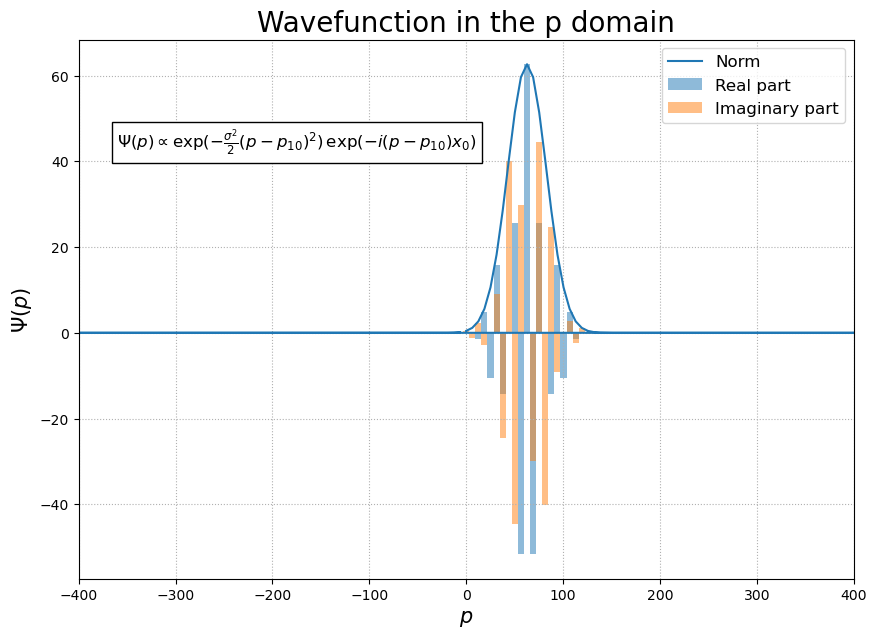

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# grid
grid_p = np.loadtxt("results/FFT_init.dat", max_rows=1)
dp = grid_p[1]-grid_p[0]

# FFT
re_FFT, im_FFT = np.loadtxt("results/FFT_init.dat", skiprows=1, unpack=True)
FFT_init = re_FFT + im_FFT*1j

# plot
ax.bar(x=grid_p, height=np.real(FFT_init), label="Real part", alpha=0.5, width=dp)
ax.bar(x=grid_p, height=np.imag(FFT_init), label="Imaginary part", alpha=0.5, width=dp)
ax.plot(grid_p, np.abs(FFT_init), label="Norm")
    

ax.set_title(f"Wavefunction in the p domain", fontsize=20)
ax.set_xlabel(r"$p$", fontsize=15)
ax.set_ylabel(r"$\Psi(p)$", fontsize=15)
ax.set_xlim(-400,400)
ax.grid(True, which="both", linestyle=":")

# print formula
ax.text(0.05, 0.8, s=r"$\Psi(p) \propto \exp(-\frac{\sigma^2}{2} (p-p_{10})^2)\, \exp(-i (p-p_{10}) x_0 )$",
        transform=ax.transAxes, fontsize=12, bbox=dict(facecolor="w"))

ax.legend(fontsize=12)

if save_plots:
    fig.savefig("results/FFT_init.png", dpi=400, format='png')

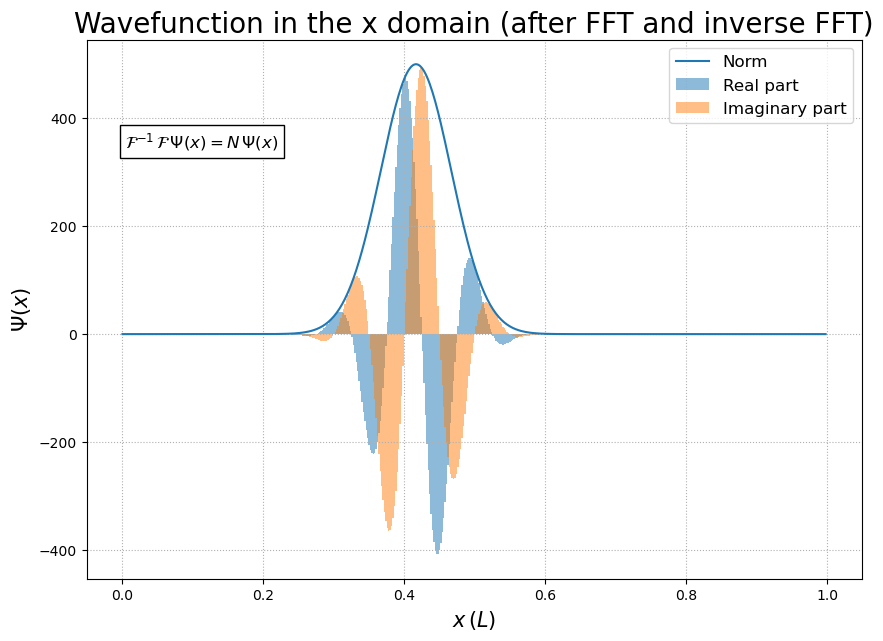

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# grid
grid_x = np.loadtxt("results/FFT_inverse.dat", max_rows=1)
dx = grid_x[1]-grid_x[0]

# inverse FFT to get the original function
re_inverse, im_inverse = np.loadtxt("results/FFT_inverse.dat", skiprows=1, unpack=True)
FFT_inverse = re_inverse + im_inverse*1j

# plot
ax.bar(x=grid_x, height=np.real(FFT_inverse), label="Real part", alpha=0.5, width=dx)
ax.bar(x=grid_x, height=np.imag(FFT_inverse), label="Imaginary part", alpha=0.5, width=dx)
ax.plot(grid_x, np.abs(FFT_inverse), label="Norm")
    

ax.set_title(f"Wavefunction in the x domain (after FFT and inverse FFT)", fontsize=20)
ax.set_xlabel(r"$x\, (L)$", fontsize=15)
ax.set_ylabel(r"$\Psi(x)$", fontsize=15)
ax.grid(True, which="both", linestyle=":")

# print formula
ax.text(0.05, 0.8, s=r"$\mathcal{F}^{-1}\, \mathcal{F}\, \Psi(x) = N\, \Psi(x)$",
        transform=ax.transAxes, fontsize=12, bbox=dict(facecolor="w"))

ax.legend(fontsize=12)

if save_plots:
    fig.savefig("results/FFT_inverse.png", dpi=400, format='png')

### Plots for actual exercise 5

In [4]:
Ttot = float(open("input/Ttot.dat").readlines()[0].strip("\n").strip(" "))
omega = float(open("input/omega.dat").readlines()[0].strip("\n").strip(" "))
Nt = 1000

print(f"Ttot = {Ttot}")
print(f"omega = {omega}")
print(f"Nt = {Nt}")

Ttot = 10.0
omega = 1.0
Nt = 1000


In [5]:
dir_path = r'results/WFs/outWF_*.dat'
files = glob.glob(dir_path)
time_idxs = [int(re.match("results/WFs/outWF_([0-9]*).dat", file_).group(1)) for file_ in files]
time_idxs.sort()
time_idxs = [100, 500, 1000]

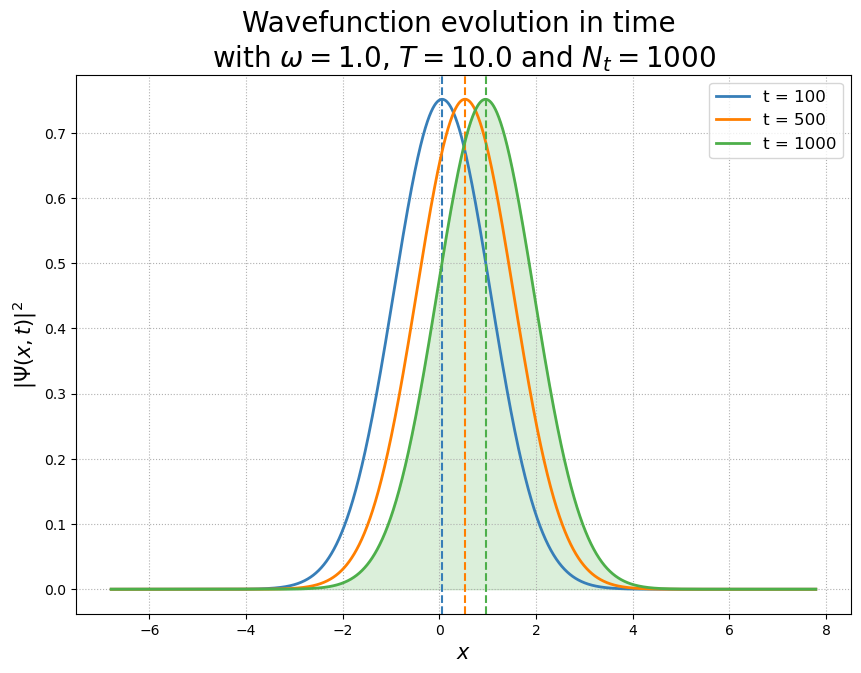

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

for i, time_idx_ in enumerate(time_idxs):
    file_ = f"results/WFs/outWF_{time_idx_}.dat"

    # grid
    grid_x = np.loadtxt(file_, max_rows=1)
    dx = grid_x[1]-grid_x[0]

    # initialized function
    re_wf, im_wf = np.loadtxt(file_, skiprows=1, unpack=True)
    wf = re_wf + im_wf*1j

    ax.plot(grid_x, np.abs(wf), label=f"t = {time_idx_}", lw=2, color=color_palette[i])

    ax.axvline(x=grid_x[np.argmax(np.abs(wf))], ls="--", color=color_palette[i])

    if time_idx_ == time_idxs[-1]:
        ax.fill_between(grid_x, 0, np.abs(wf), color=color_palette[i], alpha=0.2)


ax.set_title(f"Wavefunction evolution in time \nwith $\omega={omega}$, $T={Ttot}$ and $N_t={Nt}$", fontsize=20)
ax.set_xlabel(r"$x$", fontsize=15)
ax.set_ylabel(r"$|\Psi(x, t)|^2$", fontsize=15)
ax.grid(True, which="both", linestyle=":")
ax.legend(fontsize=12)

if save_plots:
    fig.savefig("results/WF_time_evol.png", dpi=400, format='png')

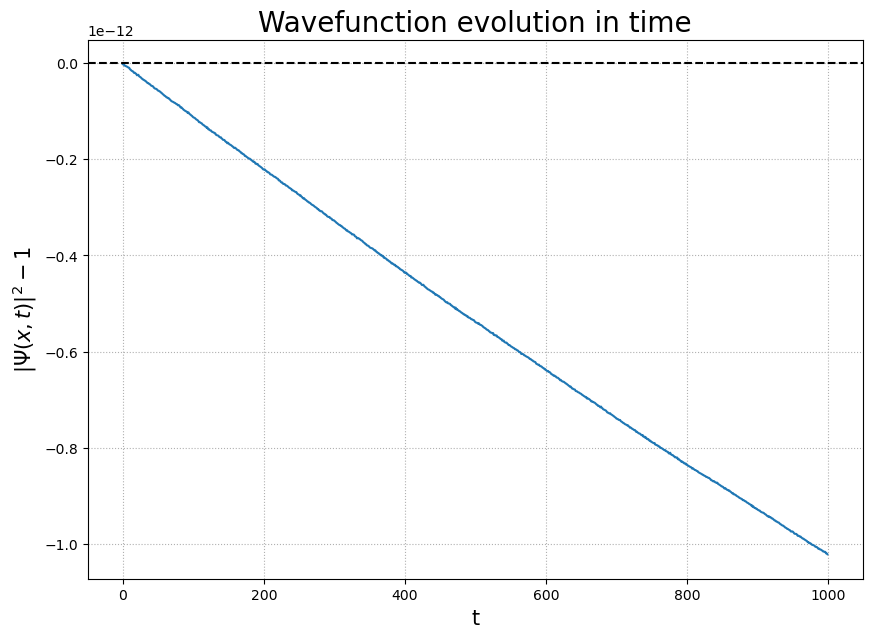

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Evolution of norm2 in time
norm2 = np.loadtxt("results/WF_norm2.dat", max_rows=1)

ax.plot(norm2-1)
ax.axhline(y=0.0, ls="--", color='k')

ax.set_title(f"Wavefunction evolution in time", fontsize=20)
ax.set_xlabel("t", fontsize=15)
ax.set_ylabel(r"$|\Psi(x, t)|^2 - 1$", fontsize=15)
ax.grid(True, which="both", linestyle=":")

if save_plots:
    fig.savefig("results/WF_norm2.png", dpi=400, format='png')

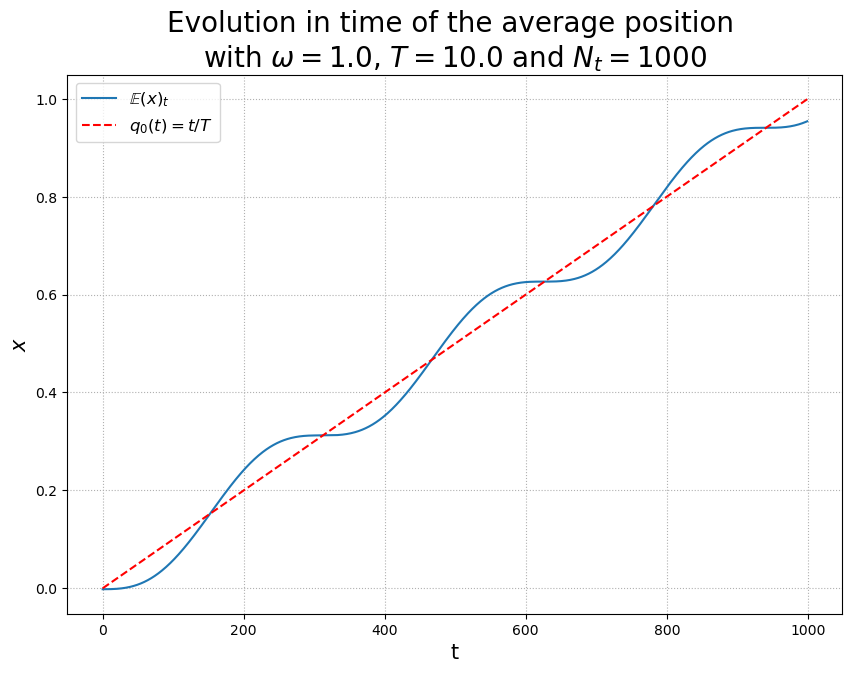

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

# Evolution of norm2 in time
avg_x = np.loadtxt("results/WF_avg_x.dat", max_rows=1)

# plots
ax.plot(avg_x, label=r"$\mathbb{E}(x)_t$")
ax.plot(np.arange(len(avg_x)), 1.0*np.arange(len(avg_x))/len(avg_x), "r--", label=r"$q_0(t)=t/T$")

ax.set_title(f"Evolution in time of the average position \nwith $\omega={omega}$, $T={Ttot}$ and $N_t={Nt}$", fontsize=20)
ax.set_xlabel("t", fontsize=15)
ax.set_ylabel("$x$", fontsize=15)
ax.grid(True, which="both", linestyle=":")
ax.legend(fontsize=12)

if save_plots:
    fig.savefig("results/WF_avg_x.png", dpi=400, format='png')

In [9]:
dir_path = r'results/WFs/outWF_*.dat'
files = glob.glob(dir_path)
time_idxs = [int(re.match("results/WFs/outWF_([0-9]*).dat", file_).group(1)) for file_ in files]
time_idxs.sort()
wf_hist = []

for i, time_idx_ in enumerate(time_idxs):
    file_ = f"results/WFs/outWF_{time_idx_}.dat"

    # grid
    grid_x = np.loadtxt(file_, max_rows=1)
    dx = grid_x[1]-grid_x[0]

    # initialized function
    re_wf, im_wf = np.loadtxt(file_, skiprows=1, unpack=True)
    wf = re_wf + im_wf*1j

    wf_hist.append(np.abs(wf)**2)
    

wf_hist = np.array(wf_hist)

In [16]:
wf_hist.shape

(100, 3646)

/var/folders/91/bv1myz2n5wxg_x3zg5p_5mnc0000gn/T/ipykernel_17748/3811403435.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.array(ax.get_yticks(), dtype=int)*10)


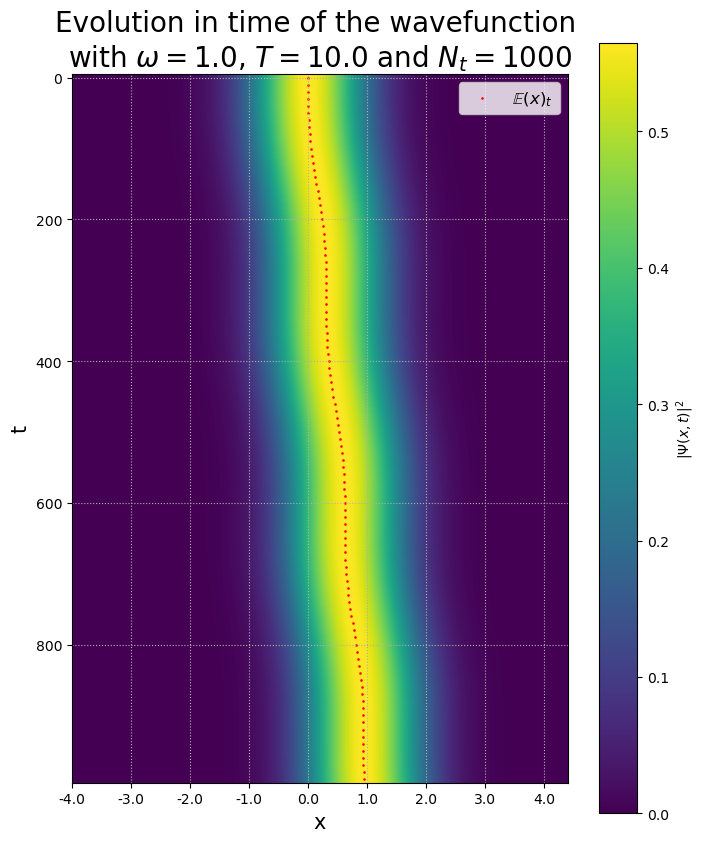

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 10))

# Evolution in time
im = ax.imshow(wf_hist[:,700:2800], aspect=30.0)
fig.colorbar(im, ax=ax, label=r"$|\Psi(x, t)|^2$")

ax.set_title(f"Evolution in time of the wavefunction \nwith $\omega={omega}$, $T={Ttot}$ and $N_t={Nt}$", fontsize=20)
ax.set_xlabel("x", fontsize=15)
ax.set_ylabel("t", fontsize=15)

# x,y tick labels
ax.set_yticklabels(np.array(ax.get_yticks(), dtype=int)*10)

integer_idxs = []
for i in np.unique(np.floor(grid_x[700:2800])):
    integer_idxs.append(np.argwhere(np.floor(grid_x[700:2800]) == i)[0])
integer_idxs = np.asarray(integer_idxs).flatten()
ax.set_xticks(integer_idxs, labels=np.floor(grid_x[700:2800][integer_idxs]))
ax.grid(True, which="both", linestyle=":")

ax.scatter(x=((avg_x-grid_x[700])/dx)[::10], y=np.arange(len(avg_x)/10, step=0.1)[::10],
           c='red', marker=".", s=3, label=r"$\mathbb{E}(x)_t$")
ax.legend(fontsize=12)

if True:
    fig.savefig("results/WF_heatmap.png", dpi=400, format='png')